In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* 전국 법정동코드 데이터를 전월세 데이터와 맵핑 가능하도록 '법정동명' 컬럼으로부터 '시군구', '법정동' 컬럼 생성하기
* 전국 법정동코드 데이터 다운로드 : https://www.code.go.kr/stdcode/regCodeL.do

In [22]:
# 법정동코드 데이터 파일 불러오기
pd.set_option('display.max_columns', None)
code = pd.read_table('/home/subin/다운로드/팩터 논문/법정동코드 전체자료.txt', encoding='cp949')
code = code[code['폐지여부']=='존재']

# '법정동명' 어절 수 세는 함수 생성 ∵  '법정동명' 어절 수에 따라 .split() 적용 이후 '시도명', '시군구명', '법정동명' 위치가 다름
def count_chunks(text):
    chunks = text.split()
    return len(chunks)

# '법정동명' 어절 수를 'num_chunks' 컬럼에 저장
code['num_chunks'] = code['법정동명'].apply(count_chunks)
code['시도'] = code['법정동명'].str.split().str[0]

code['시도'] = code['시도'].replace('강원특별자치도', '강원도')

# '법정동명' 어절 수에 따라 '시군구명', '법정동명' 컬럼 생성
mask = (code['num_chunks'] == 2) & (code['시도']=='세종특별자치시')
code.loc[mask, '법정동'] = code.loc[mask, '법정동명'].str.split().str[1]
code.loc[mask, '시군구'] = code.loc[mask, '법정동명'].str.split().str[0]

mask = code['num_chunks'] == 3
code.loc[mask, '법정동'] = code.loc[mask, '법정동명'].str.split().str[2]
code.loc[mask, '시군구'] = code.loc[mask, '법정동명'].str.split().str[1]

mask = (code['num_chunks'] == 3) & (code['시도']=='세종특별자치시')
code.loc[mask, '법정동'] = code.loc[mask, '법정동명'].str.split().str[1] + ' ' + code.loc[mask, '법정동명'].str.split().str[2]
code.loc[mask, '시군구'] = code.loc[mask, '법정동명'].str.split().str[0]

mask = code['num_chunks'] == 4
code.loc[mask, '법정동'] = code.loc[mask, '법정동명'].str.split().str[2] + ' ' + code.loc[mask, '법정동명'].str.split().str[3]
code.loc[mask, '시군구'] = code.loc[mask, '법정동명'].str.split().str[1]

mask = code['num_chunks'] == 5
code.loc[mask, '법정동'] = code.loc[mask, '법정동명'].str.split().str[3] + ' ' + code.loc[mask, '법정동명'].str.split().str[4]
code.loc[mask, '시군구'] = code.loc[mask, '법정동명'].str.split().str[1] + ' ' + code.loc[mask, '법정동명'].str.split().str[2]

code['시도'] = code['법정동명'].str.split().str[0]
code['시도'] = code['시도'].replace('강원특별자치도', '강원도')

#mask = (code['num_chunks'] == 2) & (code['법정동명'].str.split().str[1].str.endswith('동'))
#code.loc[mask, '법정동'] = code['법정동명'].str.split().str[1]
#code.loc[mask, '시군구'] = code['법정동명'].str.split().str[0]

mask = (code['num_chunks'] == 2) & (code['법정동명'].str.split().str[1].str.endswith('시'))

mask = (code['법정동명'].str.split().str[3].str.endswith('동')) & (code['num_chunks']==4)
code.loc[mask, '법정동'] = code['법정동명'].str.split().str[3]
code.loc[mask, '시군구'] = code['법정동명'].str.split().str[1] + ' ' + code['법정동명'].str.split().str[2]

mask = (code['법정동명'].str.split().str[3].str.endswith('면')) & (code['num_chunks']==4)
code.loc[mask, '법정동'] = code['법정동명'].str.split().str[3]
code.loc[mask, '시군구'] = code['법정동명'].str.split().str[1] + ' ' + code['법정동명'].str.split().str[2]

mask = (code['법정동명'].str.split().str[3].str.endswith('읍')) & (code['num_chunks']==4)
code.loc[mask, '법정동'] = code['법정동명'].str.split().str[3]
code.loc[mask, '시군구'] = code['법정동명'].str.split().str[1] + ' ' + code['법정동명'].str.split().str[2]

code.dropna(subset='법정동', inplace=True)
code['시군구코드'] = code['법정동코드'].astype(str).str[0:5].astype(int)

mask = code['법정동명'].str.contains('매산로')
code.loc[mask, '법정동'] = code['법정동명'].str.split().str[3]
code.loc[mask, '시군구'] = code['법정동명'].str.split().str[1] + ' ' + code['법정동명'].str.split().str[2]

mask = (code['법정동명'].str.contains('북문로')) | (code['법정동명'].str.contains('남문로')) | (code['법정동명'].str.contains('서완산동'))| (code['법정동명'].str.contains('동빈'))| (code['법정동명'].str.contains('경원동'))
code.loc[mask, '법정동'] = code['법정동명'].str.split().str[3]
code.loc[mask, '시군구'] = code['법정동명'].str.split().str[1] + ' ' + code['법정동명'].str.split().str[2]

mask = (code['시군구코드'] == 45111) & (code['법정동명'].str.contains('중앙동'))
code.loc[mask, '법정동'] = code['법정동명'].str.split().str[3]
code.loc[mask, '시군구'] = code['법정동명'].str.split().str[1] + ' ' + code['법정동명'].str.split().str[2]

mask = (code['시군구코드'] == 45111) & (code['법정동명'].str.contains('평화동'))
code.loc[mask, '법정동'] = code['법정동명'].str.split().str[3]
code.loc[mask, '시군구'] = code['법정동명'].str.split().str[1] + ' ' + code['법정동명'].str.split().str[2]

mask = (code['시군구코드'] == 45111) & (code['법정동명'].str.contains('중화산'))
code.loc[mask, '법정동'] = code['법정동명'].str.split().str[3]
code.loc[mask, '시군구'] = code['법정동명'].str.split().str[1] + ' ' + code['법정동명'].str.split().str[2]

mask = (code['시군구코드'] == 45111) & (code['법정동명'].str.contains('효자'))
code.loc[mask, '법정동'] = code['법정동명'].str.split().str[3]
code.loc[mask, '시군구'] = code['법정동명'].str.split().str[1] + ' ' + code['법정동명'].str.split().str[2]

mask = (code['시군구코드'] == 45111) & (code['법정동명'].str.contains('다가동'))
code.loc[mask, '법정동'] = code['법정동명'].str.split().str[3]
code.loc[mask, '시군구'] = code['법정동명'].str.split().str[1] + ' ' + code['법정동명'].str.split().str[2]

mask = (code['시군구코드'] == 45111) & (code['법정동명'].str.contains('삼천'))
code.loc[mask, '법정동'] = code['법정동명'].str.split().str[3]
code.loc[mask, '시군구'] = code['법정동명'].str.split().str[1] + ' ' + code['법정동명'].str.split().str[2]

mask = (code['법정동명'].str.contains('인후동')) | (code['법정동명'].str.contains('팔복동'))| (code['법정동명'].str.contains('우아동'))| (code['법정동명'].str.contains('호성동'))| (code['법정동명'].str.contains('여의동'))| (code['법정동명'].str.contains('두월동'))
code.loc[mask, '법정동'] = code['법정동명'].str.split().str[3]
code.loc[mask, '시군구'] = code['법정동명'].str.split().str[1] + ' ' + code['법정동명'].str.split().str[2]

mask = (code['시군구코드'] == 45113) & (code['법정동명'].str.contains('덕진동'))
code.loc[mask, '법정동'] = code['법정동명'].str.split().str[3]
code.loc[mask, '시군구'] = code['법정동명'].str.split().str[1] + ' ' + code['법정동명'].str.split().str[2]

mask = (code['시군구코드'] == 45113) & (code['법정동명'].str.contains('송천동'))
code.loc[mask, '법정동'] = code['법정동명'].str.split().str[3]
code.loc[mask, '시군구'] = code['법정동명'].str.split().str[1] + ' ' + code['법정동명'].str.split().str[2]

mask = (code['시군구코드'] == 48125) & (code['법정동명'].str.contains('신포동'))
code.loc[mask, '법정동'] = code['법정동명'].str.split().str[3]
code.loc[mask, '시군구'] = code['법정동명'].str.split().str[1] + ' ' + code['법정동명'].str.split().str[2]

mask = (code['시군구코드'] == 48125) & (code['법정동명'].str.contains('월남동'))
code.loc[mask, '법정동'] = code['법정동명'].str.split().str[3]
code.loc[mask, '시군구'] = code['법정동명'].str.split().str[1] + ' ' + code['법정동명'].str.split().str[2]

mask = (code['시군구코드'] == 48125) & (code['법정동명'].str.contains('창포동'))
code.loc[mask, '법정동'] = code['법정동명'].str.split().str[3]
code.loc[mask, '시군구'] = code['법정동명'].str.split().str[1] + ' ' + code['법정동명'].str.split().str[2]

mask = (code['시군구코드'] == 48125) & (code['법정동명'].str.contains('대성동'))
code.loc[mask, '법정동'] = code['법정동명'].str.split().str[3]
code.loc[mask, '시군구'] = code['법정동명'].str.split().str[1] + ' ' + code['법정동명'].str.split().str[2]

mask = (code['시군구코드'] == 48125) & (code['법정동명'].str.contains('중앙동'))
code.loc[mask, '법정동'] = code['법정동명'].str.split().str[3]
code.loc[mask, '시군구'] = code['법정동명'].str.split().str[1] + ' ' + code['법정동명'].str.split().str[2]

code

,법정동코드,법정동명,폐지여부,num_chunks,시도,법정동,시군구,시군구코드
2,1111010100,서울특별시 종로구 청운동,존재,3,서울특별시,청운동,종로구,11110
3,1111010200,서울특별시 종로구 신교동,존재,3,서울특별시,신교동,종로구,11110
4,1111010300,서울특별시 종로구 궁정동,존재,3,서울특별시,궁정동,종로구,11110
5,1111010400,서울특별시 종로구 효자동,존재,3,서울특별시,효자동,종로구,11110
6,1111010500,서울특별시 종로구 창성동,존재,3,서울특별시,창성동,종로구,11110
...,...,...,...,...,...,...,...,...
47911,5183035038,강원특별자치도 양양군 강현면 장산리,존재,4,강원도,강현면 장산리,양양군,51830
47912,5183035039,강원특별자치도 양양군 강현면 전진리,존재,4,강원도,강현면 전진리,양양군,51830
47913,5183035040,강원특별자치도 양양군 강현면 주청리,존재,4,강원도,강현면 주청리,양양군,51830
47914,5183035041,강원특별자치도 양양군 강현면 적은리,존재,4,강원도,강현면 적은리,양양군,51830


* 불러온 전월세 데이터 concat 해서 하나의 파일로 저장

```
rent_korea1 = pd.read_csv('/home/subin/다운로드/팩터 논문/file_name_01.csv')
rent_korea2 = pd.read_csv('/home/subin/다운로드/팩터 논문/file_name_02.csv')
rent_korea3 = pd.read_csv('/home/subin/다운로드/팩터 논문/file_name_0304 05끊김.csv')
rent_korea4 = pd.read_csv('/home/subin/다운로드/팩터 논문/file_name_0607 08끊김.csv')
rent_korea5 = pd.read_csv('/home/subin/다운로드/팩터 논문/file_name_08_leftover_copy.csv')
rent_korea6 = pd.read_csv('/home/subin/다운로드/팩터 논문/file_name_0910.csv')
rent_korea7 = pd.read_csv('/home/subin/다운로드/팩터 논문/file_name_11_leftover.csv')
rent_korea8 = pd.read_csv('/home/subin/다운로드/팩터 논문/file_name_12.csv')
rent_korea = pd.concat([rent_korea1, rent_korea2, rent_korea3, rent_korea4, rent_korea5, rent_korea6, rent_korea7, rent_korea8])
rent_korea.columns = ['index', '갱신요구권사용', '건축년도', '계약구분', '계약기간', '년', '법정동',	'보증금액',	'아파트', '월',	'월세금액',	'일', '전용면적',
                        '종전계약보증금', '종전계약월세', '지번', '지역코드', '층']
rent_korea.drop('index', axis=1, inplace=True)
rent_korea = rent_korea.drop_duplicates()
rent_korea.to_csv('2022년 전국 전월세 데이터.csv')
```

In [23]:
rent_korea = pd.read_csv('/home/subin/다운로드/팩터 논문/2022년 전국 전월세 데이터.csv')
rent_korea.drop('Unnamed: 0', axis=1, inplace=True)
rent_korea

<ipython-input-23-e96f966b7c01>:1: DtypeWarning: Columns (2,5,7,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  rent_korea = pd.read_csv('/home/subin/다운로드/팩터 논문/2022년 전국 전월세 데이터.csv')


,갱신요구권사용,건축년도,계약구분,계약기간,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,종전계약보증금,종전계약월세,지번,지역코드,층
0,,2000,,,2022,청운동,"10,000",청운현대,1,200,19.0,84.51,,,56-45,11110,3.0
1,,1999,신규,22.01~24.01,2022,통인동,"3,000",효자,1,50,5.0,61.49,,,5-1,11110,3.0
2,,2008,신규,22.01~24.01,2022,사직동,"5,000",광화문스페이스본(101동~105동),1,290,2.0,108.07,,,9,11110,1.0
3,,2008,신규,22.02~24.02,2022,사직동,"55,000",광화문스페이스본(101동~105동),1,130,4.0,86.85,,,9,11110,14.0
4,사용,2008,갱신,22.01~24.01,2022,사직동,"97,650",광화문스페이스본(101동~105동),1,0,4.0,147.31,"93,000",,9,11110,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120741,,2020,,,2022,양양읍 내곡리,"20,000",한양수자인,12,0,19.0,76.8487,,,263,51830,6.0
1120742,,1998,,,2022,현남면 광진리,"9,000",대목바다마을,12,0,1.0,38.88,,,141,51830,2.0
1120743,,2019,,,2022,강현면 강선리,"18,000",양양우미린디오션,12,0,5.0,84.98,,,987,51830,7.0
1120744,,2019,,,2022,강현면 강선리,"20,000",양양우미린디오션,12,0,31.0,75.98,,,987,51830,2.0


* '층' 컬럼 말고는 결측치 없음.

In [24]:
pd.set_option('display.max_rows', None)
rent_korea.isnull().sum()

갱신요구권사용      0
건축년도         0
계약구분         0
계약기간         0
년            0
법정동          0
보증금액         0
아파트          0
월            0
월세금액         0
일            0
전용면적         0
종전계약보증금      0
종전계약월세       0
지번           0
지역코드         0
층          401
dtype: int64

* 지역코드랑 지번 데이터 바뀐 경우 처리
* 법정동이 숫자로 잘못 들어가있는 경우 -> 열이 하나씩 밀려있어 처리 필요

In [25]:
# 지역코드랑 지번 데이터 바뀐 경우 처리

pd.set_option('display.max_rows', 10)

rent_korea['법정동_삭제'] = rent_korea['법정동'].str.split().str[0]
condition = rent_korea['지역코드'] < 10000
rent_korea.loc[condition, ['지번', '지역코드']] = rent_korea.loc[condition, ['지역코드', '지번']].values
rent_korea['지역코드'] = rent_korea['지역코드'].astype(float)

# 법정동이 숫자로 잘못 들어가있는 경우 -> 열이 하나씩 밀려있어 처리 필요
# 법정동 열에 한글이 안 들어가있는 경우에 transpose을 활용하여 열을 하나씩 미는 작업 진행

korean_words = rent_korea['법정동'].str.extract(r'([가-힣]+)', expand=False)
rent_korea['법정동_한글포함'] = korean_words

transpose = rent_korea[rent_korea['법정동_한글포함'].isnull()==True]
transpose = transpose.T
transpose.loc['층'] = transpose.loc['지번']

rows_to_shift = ['건축년도', '계약구분', '계약기간', '년', '법정동', '보증금액', '아파트', '월', '월세금액', '일', '전용면적', '종전계약보증금', '종전계약월세', '지번']

transpose.loc[rows_to_shift, :] = transpose.loc[rows_to_shift, :].shift()
transpose = transpose.T

rent_korea = pd.concat([rent_korea, transpose])
rent_korea = rent_korea.drop(['법정동_한글포함', '법정동_삭제'], axis=1)
rent_korea = rent_korea[rent_korea['년'] != '잠실동']

rent_korea['년'] = rent_korea['년'].astype(int)
rent_korea['지역코드'] = rent_korea['지역코드'].astype(int)
rent_korea['일'] = rent_korea['일'].astype(int)

rent_korea

,갱신요구권사용,건축년도,계약구분,계약기간,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,종전계약보증금,종전계약월세,지번,지역코드,층
0,,2000,,,2022,청운동,"10,000",청운현대,1,200,19,84.51,,,56-45,11110,3.0
1,,1999,신규,22.01~24.01,2022,통인동,"3,000",효자,1,50,5,61.49,,,5-1,11110,3.0
2,,2008,신규,22.01~24.01,2022,사직동,"5,000",광화문스페이스본(101동~105동),1,290,2,108.07,,,9,11110,1.0
3,,2008,신규,22.02~24.02,2022,사직동,"55,000",광화문스페이스본(101동~105동),1,130,4,86.85,,,9,11110,14.0
4,사용,2008,갱신,22.01~24.01,2022,사직동,"97,650",광화문스페이스본(101동~105동),1,0,4,147.31,"93,000",,9,11110,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768426,사용,None,갱신,22.09~24.09,2022,잠실동,"10,000",주공3,9,264,13,49.5,"10,000",250,35,11710,2
857654,,None,갱신,22.10~24.10,2022,잠실동,"40,000",주공3,10,270,6,49.5,"40,000",115,35,11710,5
857668,,None,신규,22.12~24.12,2022,잠실동,"78,000",주공3,10,0,7,49.5,,,35,11710,3
857932,,None,갱신,23.02~25.02,2022,잠실동,"60,000",주공3,10,110,24,49.5,"60,000",110,35,11710,1


* '보증금액' 컬럼 데이터 잘못 들어간 경우 처리

In [26]:
# '보증금액' 데이터를 숫자형 변수로 변경
numeric_values = rent_korea['보증금액'].str.extract(r'([\d,]+)', expand=False)
numeric_values = numeric_values.str.replace(',', '').astype(float)
rent_korea['보증금액_float'] = numeric_values

# '보증금액'에서 콤마(,) 없는 경우 '보증금액_float'에서 결측치 -> 따로 처리해서 결측치 채워주기
fill_deposit = rent_korea[rent_korea['보증금액_float'].isnull()==True]
fill_deposit['보증금액_float'] = fill_deposit['보증금액']
rent_korea = pd.concat([rent_korea, fill_deposit])
rent_korea.dropna(subset='보증금액_float', inplace=True)
rent_korea = rent_korea.drop('보증금액', axis=1)
rent_korea.rename(columns={'지역코드':'시군구코드'}, inplace=True)

# '법정동' 컬럼으로 맵핑 가능하도록 이름 수정
rent_korea['법정동'] = rent_korea['법정동'].replace('북문로2가동', '북문로2가')
rent_korea['법정동'] = rent_korea['법정동'].replace('북문로3가동', '북문로3가')
rent_korea['법정동'] = rent_korea['법정동'].replace('남문로1가동', '남문로1가')
rent_korea

<ipython-input-26-15cb0b65fd70>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fill_deposit['보증금액_float'] = fill_deposit['보증금액']


,갱신요구권사용,건축년도,계약구분,계약기간,년,법정동,아파트,월,월세금액,일,전용면적,종전계약보증금,종전계약월세,지번,시군구코드,층,보증금액_float
0,,2000,,,2022,청운동,청운현대,1,200,19,84.51,,,56-45,11110,3.0,10000.0
1,,1999,신규,22.01~24.01,2022,통인동,효자,1,50,5,61.49,,,5-1,11110,3.0,3000.0
2,,2008,신규,22.01~24.01,2022,사직동,광화문스페이스본(101동~105동),1,290,2,108.07,,,9,11110,1.0,5000.0
3,,2008,신규,22.02~24.02,2022,사직동,광화문스페이스본(101동~105동),1,130,4,86.85,,,9,11110,14.0,55000.0
4,사용,2008,갱신,22.01~24.01,2022,사직동,광화문스페이스본(101동~105동),1,0,4,147.31,"93,000",,9,11110,9.0,97650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720891,,2005,신규,22.07~24.07,2022,월곶동,풍림아이원2차,5,0,24,37.918,,,1010-1,41390,11.0,18000
720892,,2013,갱신,22.05~23.05,2022,월곶동,알파시티,5,50,25,32.48,500,45,992-5,41390,7.0,500
720893,,2005,,22.06~24.06,2022,월곶동,풍림아이원3차,5,0,25,59.989,,,1016,41390,10.0,24000
720894,,2005,갱신,22.05~24.05,2022,월곶동,풍림아이원2차,5,65,25,37.918,500,50,1010-1,41390,6.0,500


In [27]:
merge_code_dong = pd.merge(rent_korea, code, on=['시군구코드', '법정동'], how='left')
merge_code_dong

,갱신요구권사용,건축년도,계약구분,계약기간,년,법정동,아파트,월,월세금액,일,전용면적,종전계약보증금,종전계약월세,지번,시군구코드,층,보증금액_float,법정동코드,법정동명,폐지여부,num_chunks,시도,시군구
0,,2000,,,2022,청운동,청운현대,1,200,19,84.51,,,56-45,11110,3.0,10000.0,1111010100,서울특별시 종로구 청운동,존재,3,서울특별시,종로구
1,,1999,신규,22.01~24.01,2022,통인동,효자,1,50,5,61.49,,,5-1,11110,3.0,3000.0,1111010800,서울특별시 종로구 통인동,존재,3,서울특별시,종로구
2,,2008,신규,22.01~24.01,2022,사직동,광화문스페이스본(101동~105동),1,290,2,108.07,,,9,11110,1.0,5000.0,1111011500,서울특별시 종로구 사직동,존재,3,서울특별시,종로구
3,,2008,신규,22.02~24.02,2022,사직동,광화문스페이스본(101동~105동),1,130,4,86.85,,,9,11110,14.0,55000.0,1111011500,서울특별시 종로구 사직동,존재,3,서울특별시,종로구
4,사용,2008,갱신,22.01~24.01,2022,사직동,광화문스페이스본(101동~105동),1,0,4,147.31,"93,000",,9,11110,9.0,97650.0,1111011500,서울특별시 종로구 사직동,존재,3,서울특별시,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120741,,2005,신규,22.07~24.07,2022,월곶동,풍림아이원2차,5,0,24,37.918,,,1010-1,41390,11.0,18000,4139013100,경기도 시흥시 월곶동,존재,3,경기도,시흥시
1120742,,2013,갱신,22.05~23.05,2022,월곶동,알파시티,5,50,25,32.48,500,45,992-5,41390,7.0,500,4139013100,경기도 시흥시 월곶동,존재,3,경기도,시흥시
1120743,,2005,,22.06~24.06,2022,월곶동,풍림아이원3차,5,0,25,59.989,,,1016,41390,10.0,24000,4139013100,경기도 시흥시 월곶동,존재,3,경기도,시흥시
1120744,,2005,갱신,22.05~24.05,2022,월곶동,풍림아이원2차,5,65,25,37.918,500,50,1010-1,41390,6.0,500,4139013100,경기도 시흥시 월곶동,존재,3,경기도,시흥시


* '층' 컬럼 말고 결측치 없음

In [28]:
pd.set_option('display.max_rows', None)
merge_code_dong.isnull().sum()

갱신요구권사용         0
건축년도            6
계약구분            0
계약기간            0
년               0
법정동             0
아파트             0
월               0
월세금액            0
일               0
전용면적            0
종전계약보증금         0
종전계약월세          0
지번              0
시군구코드           0
층             395
보증금액_float      0
법정동코드           0
법정동명            0
폐지여부            0
num_chunks      0
시도              0
시군구             0
dtype: int64

* 컬럼명, 컬럼별 datatype 수정
* Cap Rate 계산에 필요한 새로운 컬럼 생성
* '층' 컬럼 결측치 처리

In [34]:
pd.set_option('display.max_rows', 10)

# '보증금액' 컬럼 (dtype:int) 생성
merge_code_dong['보증금액'] = merge_code_dong['보증금액_float'].astype(int)
merge_code_dong= merge_code_dong.drop('보증금액_float', axis=1)

# '월세금액' 컬럼에 속한 object data 처리해서 모두 int로 변환
merge_code_dong['월세금액_int'] = merge_code_dong['월세금액'].astype(str).str.extract(r'([\d,]+)')
merge_code_dong['월세금액_int'] = merge_code_dong['월세금액_int'].str.replace(',', '')
merge_code_dong['월세금액_int'] = merge_code_dong['월세금액_int'].astype(int)

# '월세금액'으로 컬럼명 변경
merge_code_dong.drop('월세금액', axis=1, inplace=True)
merge_code_dong.rename(columns={'월세금액_int':'월세금액'}, inplace=True)

# Cap Rate의 순수익을 계산하기 위한 컬럼 생성
merge_code_dong['전용면적'] = merge_code_dong['전용면적'].astype(float)
merge_code_dong['제곱미터당 월세(만원)'] = merge_code_dong['월세금액'] / merge_code_dong['전용면적']
merge_code_dong['제곱미터당 보증금(만원)'] = merge_code_dong['보증금액'] / merge_code_dong['전용면적']

# '층'이랑 '지번'이랑 바뀌어있는 경우 존재 -> fillna
merge_code_dong['층'] = merge_code_dong['층'].fillna(merge_code_dong['지번'])
merge_code_dong

,갱신요구권사용,건축년도,계약구분,계약기간,년,법정동,아파트,월,일,전용면적,종전계약보증금,종전계약월세,지번,시군구코드,층,법정동코드,법정동명,폐지여부,num_chunks,시도,시군구,보증금액,월세금액,제곱미터당 월세(만원),제곱미터당 보증금(만원)
0,,2000,,,2022,청운동,청운현대,1,19,84.510,,,56-45,11110,3.0,1111010100,서울특별시 종로구 청운동,존재,3,서울특별시,종로구,10000,200,2.366584,118.329192
1,,1999,신규,22.01~24.01,2022,통인동,효자,1,5,61.490,,,5-1,11110,3.0,1111010800,서울특별시 종로구 통인동,존재,3,서울특별시,종로구,3000,50,0.813140,48.788421
2,,2008,신규,22.01~24.01,2022,사직동,광화문스페이스본(101동~105동),1,2,108.070,,,9,11110,1.0,1111011500,서울특별시 종로구 사직동,존재,3,서울특별시,종로구,5000,290,2.683446,46.266309
3,,2008,신규,22.02~24.02,2022,사직동,광화문스페이스본(101동~105동),1,4,86.850,,,9,11110,14.0,1111011500,서울특별시 종로구 사직동,존재,3,서울특별시,종로구,55000,130,1.496834,633.275763
4,사용,2008,갱신,22.01~24.01,2022,사직동,광화문스페이스본(101동~105동),1,4,147.310,"93,000",,9,11110,9.0,1111011500,서울특별시 종로구 사직동,존재,3,서울특별시,종로구,97650,0,0.000000,662.887788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120741,,2005,신규,22.07~24.07,2022,월곶동,풍림아이원2차,5,24,37.918,,,1010-1,41390,11.0,4139013100,경기도 시흥시 월곶동,존재,3,경기도,시흥시,18000,0,0.000000,474.708582
1120742,,2013,갱신,22.05~23.05,2022,월곶동,알파시티,5,25,32.480,500,45,992-5,41390,7.0,4139013100,경기도 시흥시 월곶동,존재,3,경기도,시흥시,500,50,1.539409,15.394089
1120743,,2005,,22.06~24.06,2022,월곶동,풍림아이원3차,5,25,59.989,,,1016,41390,10.0,4139013100,경기도 시흥시 월곶동,존재,3,경기도,시흥시,24000,0,0.000000,400.073347
1120744,,2005,갱신,22.05~24.05,2022,월곶동,풍림아이원2차,5,25,37.918,500,50,1010-1,41390,6.0,4139013100,경기도 시흥시 월곶동,존재,3,경기도,시흥시,500,65,1.714225,13.186349


* '건축년도' 6개 말고 결측치 없음

In [35]:
pd.set_option('display.max_rows', None)
merge_code_dong.isnull().sum()

갱신요구권사용          0
건축년도             6
계약구분             0
계약기간             0
년                0
법정동              0
아파트              0
월                0
일                0
전용면적             0
종전계약보증금          0
종전계약월세           0
지번               0
시군구코드            0
층                0
법정동코드            0
법정동명             0
폐지여부             0
num_chunks       0
시도               0
시군구              0
보증금액             0
월세금액             0
제곱미터당 월세(만원)     0
제곱미터당 보증금(만원)    0
dtype: int64

* 개별 아파트 수준으로 평균치 내기
* 층별/면적별 데이터 수에 편차가 존재할 수 있으므로, 바로 아파트 수준으로 평균 내지 않고 층별/면적별로 순차적으로 평균 계산

In [36]:
pd.set_option('display.max_rows', 10)
rent_korea_avg = merge_code_dong.groupby(['시도', '시군구', '법정동', '법정동명', '아파트', '전용면적', '층']).mean().reset_index()
rent_korea_avg = rent_korea_avg.groupby(['시도', '시군구', '법정동', '법정동명', '아파트', '전용면적']).mean().reset_index()
rent_korea_avg = rent_korea_avg.groupby(['시도', '시군구', '법정동', '법정동명', '아파트']).mean().reset_index()
rent_korea_avg

<ipython-input-36-e7ec3bfd8124>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rent_korea_avg = merge_code_dong.groupby(['시도', '시군구', '법정동', '법정동명', '아파트', '전용면적', '층']).mean().reset_index()


,시도,시군구,법정동,법정동명,아파트,전용면적,층,년,일,시군구코드,법정동코드,num_chunks,보증금액,월세금액,제곱미터당 월세(만원),제곱미터당 보증금(만원)
0,강원도,강릉시,견소동,강원특별자치도 강릉시 견소동,송정한신,66.17500,6.740909,2022.0,17.154293,51150.0,5.115012e+09,3.0,11124.698990,25.970960,0.439297,166.422354
1,강원도,강릉시,견소동,강원특별자치도 강릉시 견소동,송정해변신도브래뉴아파트,72.49000,8.500000,2022.0,16.299167,51150.0,5.115012e+09,3.0,19746.256944,16.184028,0.221018,272.636401
2,강원도,강릉시,교동,강원특별자치도 강릉시 교동,강릉교동롯데캐슬1단지,110.07965,2.500000,2022.0,23.250000,51150.0,5.115011e+09,3.0,42000.000000,0.000000,0.000000,389.348740
3,강원도,강릉시,교동,강원특별자치도 강릉시 교동,강릉교동롯데캐슬2단지,112.71830,9.333333,2022.0,13.833333,51150.0,5.115011e+09,3.0,18333.333333,95.333333,0.865377,174.587936
4,강원도,강릉시,교동,강원특별자치도 강릉시 교동,강릉교동풍림아이원아파트,75.51760,11.916667,2022.0,24.583333,51150.0,5.115011e+09,3.0,30729.166667,13.333333,0.201902,400.938024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34336,충청북도,충주시,호암동,충청북도 충주시 호암동,한양,59.84000,4.000000,2022.0,15.333333,43130.0,4.313011e+09,3.0,1000.000000,48.333333,0.807709,16.711230
34337,충청북도,충주시,호암동,충청북도 충주시 호암동,호반현대,72.36000,7.166667,2022.0,11.708333,43130.0,4.313011e+09,3.0,5875.000000,22.500000,0.326872,83.419838
34338,충청북도,충주시,호암동,충청북도 충주시 호암동,호암동수채,84.92890,9.000000,2022.0,14.000000,43130.0,4.313011e+09,3.0,16400.000000,0.000000,0.000000,193.102701
34339,충청북도,충주시,호암동,충청북도 충주시 호암동,호암리버빌(1단지),84.68000,7.111111,2022.0,14.777778,43130.0,4.313011e+09,3.0,12640.740741,20.555556,0.242744,149.276579


In [37]:
# 필요한 컬럼만 남기기

rent_avg = rent_korea_avg[['시도', '시군구', '법정동', '법정동명', '아파트', '보증금액', '월세금액', '제곱미터당 월세(만원)', '제곱미터당 보증금(만원)']]

<h2> 전국 unique한 아파트 수 : 34341 개

<h3> 시도별 비율을 보면 서울·경기·부산이 과반 차지, 세종이 최하위로 0.6% (220개) 차지

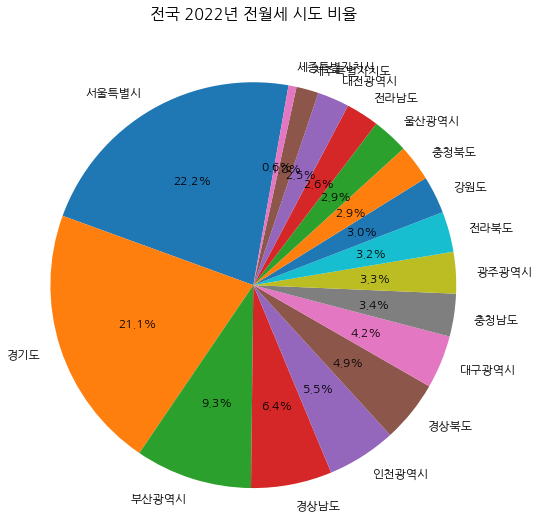

In [39]:
# 전월세 데이터 시도별 비율 시각화

value_counts = rent_korea_avg['시도'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=80)
plt.title('전국 2022년 전월세 시도 비율', fontsize=16, y=1.1)
plt.rc('font', size=12, family='NanumGothic')
plt.axis('equal')

plt.show()

In [40]:
print('<< 시도별 전월세 데이터 수 >>\n')
pd.set_option('display.max_rows', None)
print(value_counts)

<< 시도별 전월세 데이터 수 >>

서울특별시      7633
경기도        7231
부산광역시      3198
경상남도       2213
인천광역시      1894
경상북도       1689
대구광역시      1453
충청남도       1168
광주광역시      1137
전라북도       1105
강원도        1026
충청북도        997
울산광역시       992
전라남도        906
대전광역시       870
제주특별자치도     609
세종특별자치시     220
Name: 시도, dtype: int64


In [41]:
# 결측치 없음

rent_avg.isnull().sum()

시도               0
시군구              0
법정동              0
법정동명             0
아파트              0
보증금액             0
월세금액             0
제곱미터당 월세(만원)     0
제곱미터당 보증금(만원)    0
dtype: int64

<h2> 실거래가 데이터 전처리

In [43]:
# 실거래가 데이터 불러오기

pd.set_option('display.max_rows', 10)
actualPrice = pd.read_csv('/home/subin/다운로드/여피/0315 업무/trade_history_2018-2023_edit.csv', header=None)
actualPrice.columns = ['old_addr_idx', '거래날짜', '거래가격', '임대면적', '층', '알수없음_1', '거래방식', '알수없음_2', '알수없음_3', '시군구', '번지', '읍면동', '건물명', '세대수', '건축연도', '건물종류']
actualPrice['임대면적'] = actualPrice['임대면적'].round(2)

# '서울 강남구, 경기 하남시' 와 같이 주소가 들어간 경우가 있어 아래와 같이 .split() 진행
actualPrice['시도1'] = actualPrice['시군구'].str.split().str[0]
actualPrice['시군구1'] = actualPrice['시군구'].str.split().str[1]
actualPrice['시도2'] = actualPrice['시군구'].str.split().str[2]
actualPrice['시군구2'] = actualPrice['시군구'].str.split().str[3]

<ipython-input-43-3677aea3160a>:4: DtypeWarning: Columns (5,6,8,9,10,11,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  actualPrice = pd.read_csv('/home/subin/다운로드/여피/0315 업무/trade_history_2018-2023_edit.csv', header=None)


* 주소 데이터 보완을 위해 공시지가 데이터 활용

In [44]:
officialPrice = pd.read_csv('/home/subin/다운로드/여피/0308 업무-20230310T030110Z-001/0308 업무/complex_20230308 (사본).csv', header=None)
officialPrice.columns = ['old_addr_idx', 'complex_name', 'property_type','시도', '시군구',
               '읍면동','리','road_name','road_code','admin_dong_code','postal_code','jibun_main','jibun_sub','updated']

# 전월세 데이터의 '법정동' 컬럼은 공시지가 데이터에서 '읍면동', '리'가 합쳐진 형태
# '법정동'으로 맵핑이 가능하도록 새롭게 '법정동' 컬럼 생성
officialPrice['법정동'] = officialPrice.apply(lambda row: row['읍면동'] + ' ' + row['리'] if pd.notnull(row['리']) else row['읍면동'], axis=1)
officialPrice

,old_addr_idx,complex_name,property_type,시도,시군구,읍면동,리,road_name,road_code,admin_dong_code,postal_code,jibun_main,jibun_sub,updated,법정동
0,1111010100_00001_00000_apartment,청운벽산빌리지,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,1,0,2021-01-01,청운동
1,1111010100_00003_00000_apartment,인텔빌라B C동,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,3,0,2021-01-01,청운동
2,1111010100_00003_00150_apartment,인텔빌라A동,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,3,150,2021-01-01,청운동
3,1111010100_00004_00001_apartment,아델하우스,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,4,1,2021-01-01,청운동
4,1111010100_00004_00003_apartment,GRACETUSCANII,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,4,3,2021-01-01,청운동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320920,5013032022_00048_00003_apartment,표선제이파크빌,apartment,제주특별자치도,서귀포시,표선면,하천리,일주동로5661번길,501304850717,5013032000,63627,48,3,2021-01-01,표선면 하천리
320921,5013032022_02167_00000_apartment,지오화이트빌리지,apartment,제주특별자치도,서귀포시,표선면,하천리,한마음초등로,501303350311,5013032000,63627,2167,0,2021-01-01,표선면 하천리
320922,5013032023_02008_00000_apartment,보네르펜션,apartment,제주특별자치도,서귀포시,표선면,성읍리,번영로,501303349234,5013032000,63624,2008,0,2022-06-01,표선면 성읍리
320923,5013032024_02521_00005_apartment,(2521-5),apartment,제주특별자치도,서귀포시,표선면,가시리,중산간동로,501303349238,5013032000,63623,2521,5,2021-01-01,표선면 가시리


* 공시지가 데이터에서 맵핑할 '법정동'이 결측값인 경우 11119개 존재

In [45]:
officialPrice[officialPrice['법정동'].isnull()==True]

,old_addr_idx,complex_name,property_type,시도,시군구,읍면동,리,road_name,road_code,admin_dong_code,postal_code,jibun_main,jibun_sub,updated,법정동
1480,1111017400_00640_00065_apartment,대아빌라B동,apartment,서울특별시,종로구,NaN,NaN,NaN,\N,\N,\N,\N,\N,2021-01-01,NaN
1639,1111017500_00181_00202_apartment,(181-202),apartment,서울특별시,종로구,NaN,NaN,NaN,\N,\N,\N,\N,\N,2021-01-01,NaN
2361,1111018400_00150_00007_apartment,부암동 에스톤힐,apartment,서울특별시,종로구,NaN,NaN,NaN,\N,\N,\N,\N,\N,2021-01-01,NaN
2500,1111018600_00212_00001_apartment,완성빌라,apartment,서울특별시,종로구,NaN,NaN,NaN,\N,\N,\N,\N,\N,2021-01-01,NaN
2584,1114013600_00022_00022_apartment,(22-22),apartment,서울특별시,중구,NaN,NaN,NaN,\N,\N,\N,\N,\N,2021-01-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320905,5013032021_01603_00003_apartment,해비치 스튜디오 132(103동),apartment,제주특별자치도,서귀포시,NaN,NaN,NaN,\N,\N,\N,\N,\N,2021-01-01,NaN
320907,5013032021_01603_00005_apartment,해비치 스튜디오 132(106동),apartment,제주특별자치도,서귀포시,NaN,NaN,NaN,\N,\N,\N,\N,\N,2021-01-01,NaN
320908,5013032021_01603_00006_apartment,해비치 스튜디오132 107동,apartment,제주특별자치도,서귀포시,NaN,NaN,NaN,\N,\N,\N,\N,\N,2021-01-01,NaN
320909,5013032021_01603_00008_apartment,해비치 스튜디오 132(102동),apartment,제주특별자치도,서귀포시,NaN,NaN,NaN,\N,\N,\N,\N,\N,2021-01-01,NaN


* 실거래가, 공시지가를 건물코드('old_addr_idx')로 맵핑하여, 실거래가 데이터의 주소 보완

In [46]:
# 건물코드로 실거래가, 공시지가 맵핑
actualPrice = pd.merge(actualPrice, officialPrice, on='old_addr_idx', how='left')

# 맵핑 이후 공시지가 주소 데이터('시도', '시군구_y', '읍면동_y' 컬럼)이 비고,
# 실거래가 주소 데이터가 하나밖에 존재하지 않는 경우(='서울 강남구', !='서울 강남구, 경기 하남시') 해당 데이터로 채우기
actualPrice['시도'] = actualPrice.apply(lambda row: row['시도1'] if pd.isnull(row['시도2']) and pd.notnull(row['시도1']) else row['시도'], axis=1)
actualPrice['시군구_y'] = actualPrice.apply(lambda row: row['시군구1'] if pd.isnull(row['시군구2']) and pd.notnull(row['시군구1']) else row['시군구_y'], axis=1)
actualPrice['읍면동_y'] = actualPrice.apply(lambda row: row['읍면동_x'] if pd.isnull(row['읍면동_y']) and pd.notnull(row['읍면동_x']) else row['읍면동_y'], axis=1)

# 정식 시도명으로 통일
actualPrice['시도'] = actualPrice['시도'].replace('서울', '서울특별시')
actualPrice['시도'] = actualPrice['시도'].replace('인천', '인천광역시')
actualPrice['시도'] = actualPrice['시도'].replace('부산', '부산광역시')
actualPrice['시도'] = actualPrice['시도'].replace('울산', '울산광역시')
actualPrice['시도'] = actualPrice['시도'].replace('대구', '대구광역시')
actualPrice['시도'] = actualPrice['시도'].replace('광주', '광주광역시')
actualPrice['시도'] = actualPrice['시도'].replace('대전', '대전광역시')
actualPrice['시도'] = actualPrice['시도'].replace('세종시', '세종특별자치시')
actualPrice['시도'] = actualPrice['시도'].replace('경기', '경기도')
actualPrice['시도'] = actualPrice['시도'].replace('강원', '강원도')
actualPrice['시도'] = actualPrice['시도'].replace('충북', '충청북도')
actualPrice['시도'] = actualPrice['시도'].replace('충남', '충청남도')
actualPrice['시도'] = actualPrice['시도'].replace('전북', '전라북도')
actualPrice['시도'] = actualPrice['시도'].replace('전남', '전라남도')
actualPrice['시도'] = actualPrice['시도'].replace('경북', '경상북도')
actualPrice['시도'] = actualPrice['시도'].replace('경남', '경상남도')
actualPrice['시도'] = actualPrice['시도'].replace('제주', '제주특별자치도')

* 읍면동 이름을 담은 '읍면동_y' 컬럼 결측치 없음

In [53]:
print("'시도' 컬럼 결측치 수 : " + str(actualPrice['시도'].isnull().sum()))
print("'시군구_y' 컬럼 결측치 수 : " + str(actualPrice['시군구_y'].isnull().sum()))
print("'읍면동_y' 컬럼 결측치 수 : " + str(actualPrice['읍면동_y'].isnull().sum()))

'시도' 컬럼 결측치 수 : 5848
'시군구_y' 컬럼 결측치 수 : 5877
'읍면동_y' 컬럼 결측치 수 : 0


* 읍면동 이름에 대응하는 시도명, 시군구명이 공시지가 데이터에 분명 존재할 것
* '읍면동_y'을 기준으로 actualPrice와 공시지가의 주소 데이터 맵핑해서 결측치 채우기

In [54]:
# 공시지가 데이터에서 주소 데이터만 선별
offAdd = officialPrice[['시도', '시군구', '읍면동']].drop_duplicates()

# 시도명, 시군구명이 달라도 읍면동명이 같은 경우 발생 (ex. 서울특별시 마포구 중동, 경기도 부천시 중동)
# 읍면동 이름 자체만으로 전혀 겹치지 않는 경우만 선별 (∵ 읍면동 이름으로만 맵핑)
dongUnique = offAdd[offAdd.duplicated(['읍면동'], keep=False)!=True].dropna(subset='읍면동')

# 실거래가 데이터와 맵핑 가능하도록 컬럼명 변경 (읍면동_y)
# 실거래가 데이터의 기존 컬럼명과 충돌하지 않도록 컬러명 변경 (시도_uni, 시군구_uni)
dongUnique.rename(columns={'시도':'시도_uni','시군구':'시군구_uni', '읍면동':'읍면동_y'}, inplace=True)

# 맵핑 진행
actualPrice = actualPrice.merge(dongUnique, on='읍면동_y', how='left')

# 주소 데이터 fillna
actualPrice['시도'] = actualPrice['시도'].fillna(actualPrice['시도_uni'])
actualPrice['시군구_y'] = actualPrice['시군구_y'].fillna(actualPrice['시군구_uni'])

# 필요없는 컬럼 drop
actualPrice.drop(['시도_uni', '시군구_uni'], axis=1, inplace=True)
actualPrice.drop(['알수없음_2', '시군구_x', '읍면동_x', '시도1', '시도2', '시군구1', '시군구2'], axis=1, inplace=True)

# 컬럼명 수정
actualPrice.rename(columns={'알수없음_1':'세대수-?', '알수없음_3':'날짜_정체불명', '시군구_y':'시군구', '읍면동_y':'읍면동'}, inplace=True)

# 컬럼 통일
actualPrice['complex_name'] = actualPrice['complex_name'].fillna(actualPrice['건물명'])
actualPrice.drop('건물명', axis=1, inplace=True)
actualPrice['property_type'] = actualPrice['property_type'].fillna(actualPrice['건물종류'])
actualPrice.drop('건물종류', axis=1, inplace=True)

# 2022년 데이터만 선별하기 위해 '거래연도' 컬럼 생성
actualPrice['거래연도'] = actualPrice['거래날짜'].str.split('-').str[0]

# 전월세 데이터와 맵핑하기 위해 '법정동' 컬럼 생성
actualPrice['법정동'] = actualPrice['읍면동'] + ' ' + actualPrice['리']
actualPrice['법정동'] = actualPrice['법정동'].fillna(actualPrice['읍면동'])

# '시군구' 컬럼 결측치의 대부분은 '시도'=='세종특별자치시'
# 세종시는 시군구명이 존재하지 않으므로, 시도명으로 fillna
actualPrice['시군구'] = actualPrice['시군구'].fillna('세종특별자치시')
actualPrice

,old_addr_idx,거래날짜,거래가격,임대면적,층,세대수-?,거래방식,날짜_정체불명,번지,세대수,건축연도,complex_name,property_type,시도,시군구,읍면동,리,road_name,road_code,admin_dong_code,postal_code,jibun_main,jibun_sub,updated,법정동,거래연도
0,3023010200_00034_00000_apartment,2020-02-28,99000000,59.04,2,NaN,NaN,NaN,NaN,NaN,NaN,YH드림타운C동,apartment,대전광역시,대덕구,대화동,NaN,대화1길,302304304117,3023052000,34372,34,0,2022-01-01,대화동,2020
1,3023010200_00027_00007_apartment,2020-02-03,70000000,56.26,5,NaN,NaN,NaN,NaN,NaN,NaN,금강,apartment,대전광역시,대덕구,대화동,NaN,대전로,302303010002,3023052000,34373,27,7,2022-01-01,대화동,2020
2,3023010200_00027_00007_apartment,2020-03-22,66000000,56.26,1,NaN,NaN,NaN,NaN,NaN,NaN,금강,apartment,대전광역시,대덕구,대화동,NaN,대전로,302303010002,3023052000,34373,27,7,2022-01-01,대화동,2020
3,3023010200_00027_00007_apartment,2020-04-29,77000000,56.26,3,NaN,NaN,NaN,NaN,NaN,NaN,금강,apartment,대전광역시,대덕구,대화동,NaN,대전로,302303010002,3023052000,34373,27,7,2022-01-01,대화동,2020
4,3023010200_00027_00007_apartment,2020-05-25,70000000,56.26,5,NaN,NaN,NaN,NaN,NaN,NaN,금강,apartment,대전광역시,대덕구,대화동,NaN,대전로,302303010002,3023052000,34373,27,7,2022-01-01,대화동,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206971,NaN,2022-08-20,209000000,19.13,11,NaN,중개거래,NaN,41-1,11710.0,2019.0,잠실파크웨이,officetel,서울특별시,송파구,방이동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,방이동,2022
2206972,NaN,2022-08-24,139000000,19.53,4,NaN,중개거래,NaN,38-4,11710.0,2013.0,벨리시모 오피스텔,officetel,서울특별시,송파구,방이동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,방이동,2022
2206973,NaN,2022-08-27,190000000,15.98,7,NaN,중개거래,NaN,49-11,11710.0,2020.0,한 스위트 올림픽파크,officetel,서울특별시,송파구,방이동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,방이동,2022
2206974,NaN,2022-08-31,410000000,29.18,17,NaN,중개거래,NaN,46-2,11710.0,2021.0,사보이시티잠실,officetel,서울특별시,송파구,방이동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,방이동,2022


* 2206976 행 중 '시도' 2089행 결측치 -> 약 0.1%의 데이터 손실로 dropna 해도 무방하다고 판단

In [56]:
pd.set_option('display.max_rows', None)
actualPrice.isnull().sum()

old_addr_idx         16510
거래날짜                     0
거래가격                     0
임대면적                     0
층                        0
세대수-?              2202297
거래방식               2184937
날짜_정체불명            2206223
번지                 2184986
세대수                2184937
건축연도               2185580
complex_name             0
property_type            0
시도                    2089
시군구                      0
읍면동                      0
리                  1799979
road_name            16729
road_code            16605
admin_dong_code      16605
postal_code          16605
jibun_main           16605
jibun_sub            16605
updated              16605
법정동                      0
거래연도                     0
dtype: int64

---
---
---

<h2> '시군구' 데이터가 없는 2114행은 우선 '세종특별자치시'로 채워놓음! 추후 수정 필요</h2>

* 실제로 세종특별자치시에 속하지 않은 경우 수정 필요

In [58]:
pd.set_option('display.max_rows', 10)

# 실제로 세종특별자치시에 속하지 않은 경우
m = actualPrice[(actualPrice['시군구']=='세종특별자치시') & (actualPrice['시도']!='세종특별자치시')]
m

,old_addr_idx,거래날짜,거래가격,임대면적,층,세대수-?,거래방식,날짜_정체불명,번지,세대수,건축연도,complex_name,property_type,시도,시군구,읍면동,리,road_name,road_code,admin_dong_code,postal_code,jibun_main,jibun_sub,updated,법정동,거래연도
2185607,4128110100_00584_00003_apartment,2022-10-07,470000000,71.76,10,41281-3366,직거래,NaN,584-3,41281.0,2022.0,경원아인스타워,apartment,NaN,세종특별자치시,주교동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,주교동,2022
2185874,4276025022_00246_00000_apartment,2022-10-14,262800000,72.95,4,42760-287,직거래,NaN,246,42760.0,2022.0,이강아리채,apartment,NaN,세종특별자치시,평창읍 중리,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,평창읍 중리,2022
2185953,4373025033_00405_00002_apartment,2022-10-10,311000000,83.74,8,43730-184,직거래,NaN,405-2,43730.0,2022.0,태원아파트,apartment,NaN,세종특별자치시,옥천읍 대천리,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,옥천읍 대천리,2022
2185959,4374031021_00165_00007_apartment,2022-10-21,150620000,84.84,3,43740-180,직거래,NaN,165-7,43740.0,2022.0,영동부자마을아파트,apartment,NaN,세종특별자치시,용산면 구촌리,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,용산면 구촌리,2022
2185982,4377025022_01117_00000_apartment,2022-10-02,181240000,59.98,5,43770-358,직거래,NaN,1117,43770.0,2022.0,음성코아루아파트,apartment,NaN,세종특별자치시,음성읍 평곡리,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,음성읍 평곡리,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206893,NaN,2022-08-30,592000000,30.24,15,NaN,직거래,2022-12-28,588-16,11680.0,2015.0,현대썬앤빌,officetel,NaN,세종특별자치시,신사동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,신사동,2022
2206894,NaN,2022-08-30,600900000,30.24,16,NaN,직거래,NaN,588-16,11680.0,2015.0,현대썬앤빌,officetel,NaN,세종특별자치시,신사동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,신사동,2022
2206895,NaN,2022-08-30,600900000,30.24,16,NaN,직거래,2022-12-28,588-16,11680.0,2015.0,현대썬앤빌,officetel,NaN,세종특별자치시,신사동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,신사동,2022
2206896,NaN,2022-08-30,625900000,36.55,15,NaN,직거래,NaN,588-16,11680.0,2015.0,현대썬앤빌,officetel,NaN,세종특별자치시,신사동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,신사동,2022


In [582]:
m['법정동'].unique()

array(['주교동', '평창읍 중리', '옥천읍 대천리', '용산면 구촌리', '음성읍 평곡리', '금산읍 중도리',
       '도양읍 봉암리', '울진읍 고성리', '사파정동', '남지읍 남지리', '합천읍 합천리', '숭인동', '장안동',
       '창동', '연희동', '오류동', '논현동', '수정동', '양정동', '괴정동', '부곡동', '민락동',
       '기장읍 대라리', '다사읍 매곡리', '송현동', '용현동', '도화동', '연수동', '송도동', '계산동',
       '가정동', '석남동', '가좌동', '금동', '신안동', '월평동', '봉명동', '신정동', '삼산동', '하동',
       '구미동', '심곡동', '상동', '포승읍 만호리', '고잔동', '대화동', '신천동', '당동', '신장동',
       '창전동', '공도읍 마정리', '영천동', '신현동', '곤지암읍 곤지암리', '덕계동', '백석읍 오산리',
       '남항진동', '동송읍 이평리', '화천읍 상리', '수안보면 온천리', '증평읍 대동리', '대천동', '내동',
       '송악읍 기지시리', '홍북읍 신경리', '보성읍 보성리', '영광읍 신하리', '오천읍 세계리', '감포읍 감포리',
       '풍천면 갈전리', '영해면 성내리', '중앙동', '상남동', '중앙동1가', '양덕동', '봉곡동',
       '광도면 죽림리', '용강동', '애월읍 하귀1리', '조천읍 조천리', '표선면 표선리', '교동', '북면 원통리',
       '장성읍 영천리', '인의동', '상봉동', '신사동', '대현동', '목동', '대림동', '부암동', '사직동',
       '중동', '연산동', '남산동', '대곡동', '화원읍 천내리', '강화읍 남산리', '송정동', '우산동',
       '성남동', '태평동', '고등동', '지산동', '합정동', '사동', '동산동', '백석동', '와부읍 도곡리',

In [577]:
code[code['법정동']=='신사동']

,법정동코드,법정동명,폐지여부,num_chunks,시도,법정동,시군구,시군구코드
582,1138010900,서울특별시 은평구 신사동,존재,3,서울특별시,신사동,은평구,11380
1043,1168010700,서울특별시 강남구 신사동,존재,3,서울특별시,신사동,강남구,11680


---------
---------
---------

* 2022년 실거래가 데이터 수 : 142,787 개

In [583]:
actualPrice['거래연도'].value_counts()

2020    693605
2021    499512
2019    442043
2018    429029
2022    142787
Name: 거래연도, dtype: int64

* 법정동 결측치 없음

In [59]:
pd.set_option('display.max_rows', None)
actualPrice.isnull().sum()

old_addr_idx         16510
거래날짜                     0
거래가격                     0
임대면적                     0
층                        0
세대수-?              2202297
거래방식               2184937
날짜_정체불명            2206223
번지                 2184986
세대수                2184937
건축연도               2185580
complex_name             0
property_type            0
시도                    2089
시군구                      0
읍면동                      0
리                  1799979
road_name            16729
road_code            16605
admin_dong_code      16605
postal_code          16605
jibun_main           16605
jibun_sub            16605
updated              16605
법정동                      0
거래연도                     0
dtype: int64

* Cap Rate 계산에 이용될 2022년 실거래가 데이터 추출

In [60]:
pd.set_option('display.max_rows', 10)

# 2022년 실거래가 데이터만 추출
actualPrice2022 = actualPrice[actualPrice['거래연도']=='2022']

# Cap Rate의 현재가치에 해당하는 컬럼 생성하기
actualPrice2022.rename(columns={'거래가격':'거래가격(만원)'}, inplace=True)
actualPrice2022['거래가격(만원)'] = actualPrice2022['거래가격(만원)']/10000
actualPrice2022['제곱미터당 실거래가(만원)'] = actualPrice2022['거래가격(만원)']/actualPrice2022['임대면적']
actualPrice2022

<ipython-input-60-34a314dd655e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actualPrice2022.rename(columns={'거래가격':'거래가격(만원)'}, inplace=True)
<ipython-input-60-34a314dd655e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actualPrice2022['거래가격(만원)'] = actualPrice2022['거래가격(만원)']/10000
<ipython-input-60-34a314dd655e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

,old_addr_idx,거래날짜,거래가격(만원),임대면적,층,세대수-?,거래방식,날짜_정체불명,번지,세대수,건축연도,complex_name,property_type,시도,시군구,읍면동,리,road_name,road_code,admin_dong_code,postal_code,jibun_main,jibun_sub,updated,법정동,거래연도,제곱미터당 실거래가(만원)
25188,3023010200_00027_00007_apartment,2022-05-08,20800.0,56.26,3,NaN,NaN,NaN,NaN,NaN,NaN,금강,apartment,대전광역시,대덕구,대화동,NaN,대전로,302303010002,3023052000,34373,27,7,2022-01-01,대화동,2022,369.712051
25189,3023010200_00040_00067_apartment,2022-01-03,6800.0,49.00,3,NaN,NaN,NaN,NaN,NaN,NaN,대화,apartment,대전광역시,대덕구,대화동,NaN,대화로,302303168004,3023052000,34371,40,67,2022-01-01,대화동,2022,138.775510
25190,3023010200_00040_00067_apartment,2022-05-14,6800.0,49.00,2,NaN,NaN,NaN,NaN,NaN,NaN,대화,apartment,대전광역시,대덕구,대화동,NaN,대화로,302303168004,3023052000,34371,40,67,2022-01-01,대화동,2022,138.775510
25191,3023010200_00031_00036_apartment,2022-01-04,7000.0,35.88,10,NaN,NaN,NaN,NaN,NaN,NaN,두레,apartment,대전광역시,대덕구,대화동,NaN,대화1길,302304304117,3023052000,34373,31,36,2022-01-01,대화동,2022,195.094760
25192,3023010200_00031_00036_apartment,2022-01-10,6000.0,32.37,1,NaN,NaN,NaN,NaN,NaN,NaN,두레,apartment,대전광역시,대덕구,대화동,NaN,대화1길,302304304117,3023052000,34373,31,36,2022-01-01,대화동,2022,185.356812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206971,NaN,2022-08-20,20900.0,19.13,11,NaN,중개거래,NaN,41-1,11710.0,2019.0,잠실파크웨이,officetel,서울특별시,송파구,방이동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,방이동,2022,1092.524830
2206972,NaN,2022-08-24,13900.0,19.53,4,NaN,중개거래,NaN,38-4,11710.0,2013.0,벨리시모 오피스텔,officetel,서울특별시,송파구,방이동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,방이동,2022,711.725550
2206973,NaN,2022-08-27,19000.0,15.98,7,NaN,중개거래,NaN,49-11,11710.0,2020.0,한 스위트 올림픽파크,officetel,서울특별시,송파구,방이동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,방이동,2022,1188.986233
2206974,NaN,2022-08-31,41000.0,29.18,17,NaN,중개거래,NaN,46-2,11710.0,2021.0,사보이시티잠실,officetel,서울특별시,송파구,방이동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,방이동,2022,1405.071967


<h2> 전국 실거래가 데이터 수 : 26189 개

* 주소 데이터 잘못 들어가있는 31개 행 존재 ---> 직접 수정

In [61]:
# '시도'=='세종특별자치시'인 경우 31개, 잘못 들어간 것 일일이 수정할 수 있는 수준

actualPrice2022.loc[2186030, '시도'] = '충청남도'
actualPrice2022.loc[2186030, '시군구'] = '계룡시'
actualPrice2022.loc[2186030, '읍면동'] = '두마면 농소리'
actualPrice2022.loc[2186030, '법정동'] = '두마면 농소리'

actualPrice2022.loc[2205683, '시도'] = '충청북도'
actualPrice2022.loc[2205683, '시군구'] = '청주시 흥덕구'
actualPrice2022.loc[2205683, '읍면동'] = '오송읍 만수리'
actualPrice2022.loc[2205683, '법정동'] = '오송읍 만수리'

actualPrice2022.loc[2202499, '시도'] = '충청북도'
actualPrice2022.loc[2202499, '시군구'] = '청주시 흥덕구'
actualPrice2022.loc[2202499, '읍면동'] = '오송읍 만수리'
actualPrice2022.loc[2202499, '법정동'] = '오송읍 만수리'

actualPrice2022.loc[2200392, '시도'] = '충청북도'
actualPrice2022.loc[2200392, '시군구'] = '청주시 흥덕구'
actualPrice2022.loc[2200392, '읍면동'] = '복대동'
actualPrice2022.loc[2200392, '법정동'] = '복대동'

actualPrice2022.loc[2199666, '시도'] = '인천광역시'
actualPrice2022.loc[2199666, '시군구'] = '남동구'
actualPrice2022.loc[2199666, '읍면동'] = '구월동'
actualPrice2022.loc[2199666, '법정동'] = '구월동'

actualPrice2022.loc[2191844, '시도'] = '충청북도'
actualPrice2022.loc[2191844, '시군구'] = '청주시 흥덕구'
actualPrice2022.loc[2191844, '읍면동'] = '오송읍 만수리'
actualPrice2022.loc[2191844, '법정동'] = '오송읍 만수리'

actualPrice2022.loc[2188140, '시도'] = '충청북도'
actualPrice2022.loc[2188140, '시군구'] = '청주시 흥덕구'
actualPrice2022.loc[2188140, '읍면동'] = '복대동'
actualPrice2022.loc[2188140, '법정동'] = '복대동'

actualPrice2022.loc[2188145, '시도'] = '충청북도'
actualPrice2022.loc[2188145, '시군구'] = '청주시 흥덕구'
actualPrice2022.loc[2188145, '읍면동'] = '복대동'
actualPrice2022.loc[2188145, '법정동'] = '복대동'

actualPrice2022.loc[2188146, '시도'] = '충청북도'
actualPrice2022.loc[2188146, '시군구'] = '청주시 흥덕구'
actualPrice2022.loc[2188146, '읍면동'] = '복대동'
actualPrice2022.loc[2188146, '법정동'] = '복대동'

actualPrice2022.loc[2190989, '시군구'] = '세종특별자치시'
actualPrice2022.loc[2190989, '리'] = np.nan

* 맵핑에 사용할 최종 2022년 실거래가 데이터 

In [62]:
pd.set_option('display.max_rows', 10)

# 층별/면적별로 평균 계산 후, 개발 아파트 수준으로 평균 계산
floor = actualPrice2022.groupby(['시도', '시군구', '법정동', 'complex_name', '층', '임대면적']).mean().reset_index()
map_actual = floor.groupby(['시도', '시군구', '법정동', 'complex_name']).mean().reset_index()

# 법정동이 잘못 들어가있는 경우 처리 (ex. '가양동 \\N')
map_actual['법정동'] = map_actual['법정동'].str.replace(r' \\N', '')

# 컬럼명 수정 & 필요한 컬럼만 선택
map_actual.rename(columns={'complex_name':'아파트'}, inplace=True)
map_actual = map_actual[['시도', '시군구', '법정동', '아파트', '거래가격(만원)', '제곱미터당 실거래가(만원)']]
map_actual

<ipython-input-62-9a0b36a3b323>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  floor = actualPrice2022.groupby(['시도', '시군구', '법정동', 'complex_name', '층', '임대면적']).mean().reset_index()
<ipython-input-62-9a0b36a3b323>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  map_actual['법정동'] = map_actual['법정동'].str.replace(r' \\N', '')


,시도,시군구,법정동,아파트,거래가격(만원),제곱미터당 실거래가(만원)
0,강원도,강릉시,견소동,송정한신,21604.166667,336.035626
1,강원도,강릉시,견소동,송정해변신도브래뉴아파트,31560.714286,420.765020
2,강원도,강릉시,교동,강릉교동롯데캐슬1단지,43000.000000,379.269909
3,강원도,강릉시,교동,강릉교동롯데캐슬2단지,53500.000000,453.121030
4,강원도,강릉시,교동,강릉역 블루핀,11400.000000,518.181818
...,...,...,...,...,...,...
26184,충청북도,충주시,호암동,호암동수채,26775.000000,315.259626
26185,충청북도,충주시,호암동,세경,5525.103946,97.136145
26186,충청북도,충주시,호암동,예성세경,5184.199993,110.906479
26187,충청북도,충주시,호암동,진도,11066.666667,155.926488


* 맵핑에 사용할 최종 2022년 전월세 데이터 

In [595]:
rent_avg

,시도,시군구,법정동,법정동명,아파트,보증금액,월세금액,제곱미터당 월세(만원),제곱미터당 보증금(만원)
0,강원도,강릉시,견소동,강원특별자치도 강릉시 견소동,송정한신,11124.698990,25.970960,0.439297,166.422354
1,강원도,강릉시,견소동,강원특별자치도 강릉시 견소동,송정해변신도브래뉴아파트,19746.256944,16.184028,0.221018,272.636401
2,강원도,강릉시,교동,강원특별자치도 강릉시 교동,강릉교동롯데캐슬1단지,42000.000000,0.000000,0.000000,389.348740
3,강원도,강릉시,교동,강원특별자치도 강릉시 교동,강릉교동롯데캐슬2단지,18333.333333,95.333333,0.865377,174.587936
4,강원도,강릉시,교동,강원특별자치도 강릉시 교동,강릉교동풍림아이원아파트,30729.166667,13.333333,0.201902,400.938024
...,...,...,...,...,...,...,...,...,...
34336,충청북도,충주시,호암동,충청북도 충주시 호암동,한양,1000.000000,48.333333,0.807709,16.711230
34337,충청북도,충주시,호암동,충청북도 충주시 호암동,호반현대,5875.000000,22.500000,0.326872,83.419838
34338,충청북도,충주시,호암동,충청북도 충주시 호암동,호암동수채,16400.000000,0.000000,0.000000,193.102701
34339,충청북도,충주시,호암동,충청북도 충주시 호암동,호암리버빌(1단지),12640.740741,20.555556,0.242744,149.276579


# Cap Rate Table 완성
* 2022년 전국 Cap Rate 개별 아파트별 데이터 수 : 18048 개

In [63]:
cap_rate = pd.merge(map_actual, rent_avg, on=['시도', '시군구', '법정동', '아파트'])
cap_rate

,시도,시군구,법정동,아파트,거래가격(만원),제곱미터당 실거래가(만원),법정동명,보증금액,월세금액,제곱미터당 월세(만원),제곱미터당 보증금(만원)
0,강원도,강릉시,견소동,송정한신,21604.166667,336.035626,강원특별자치도 강릉시 견소동,11124.698990,25.970960,0.439297,166.422354
1,강원도,강릉시,견소동,송정해변신도브래뉴아파트,31560.714286,420.765020,강원특별자치도 강릉시 견소동,19746.256944,16.184028,0.221018,272.636401
2,강원도,강릉시,교동,강릉교동롯데캐슬1단지,43000.000000,379.269909,강원특별자치도 강릉시 교동,42000.000000,0.000000,0.000000,389.348740
3,강원도,강릉시,교동,강릉교동롯데캐슬2단지,53500.000000,453.121030,강원특별자치도 강릉시 교동,18333.333333,95.333333,0.865377,174.587936
4,강원도,강릉시,교동,교동1주공,30695.833333,433.765986,강원특별자치도 강릉시 교동,20952.137897,22.399802,0.350169,291.045082
...,...,...,...,...,...,...,...,...,...,...,...
18043,충청북도,충주시,호암동,호암동수채,26775.000000,315.259626,충청북도 충주시 호암동,16400.000000,0.000000,0.000000,193.102701
18044,충청북도,충주시,호암동,세경,5525.103946,97.136145,충청북도 충주시 호암동,3733.647254,6.141270,0.107969,67.369879
18045,충청북도,충주시,호암동,예성세경,5184.199993,110.906479,충청북도 충주시 호암동,4485.000000,15.500000,0.299517,117.112982
18046,충청북도,충주시,호암동,진도,11066.666667,155.926488,충청북도 충주시 호암동,7062.500000,15.937500,0.251865,100.069255


* Cap Rate Table 시도별 데이터 수 시각화

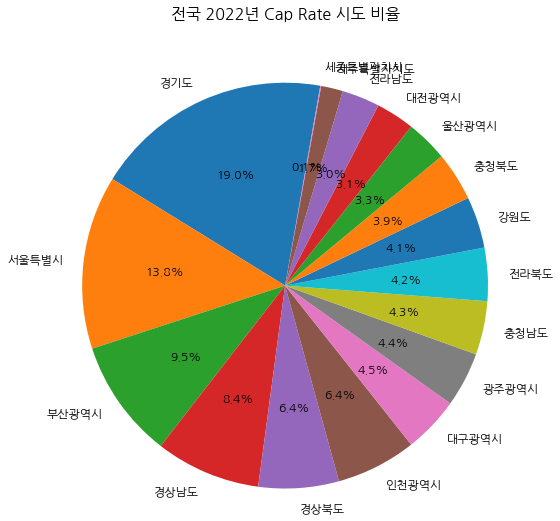

In [64]:
value_counts = cap_rate['시도'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=80)
plt.title('전국 2022년 Cap Rate 시도 비율', fontsize=16, y=1.1)
plt.rc('font', size=12)
plt.axis('equal')
plt.rc('font', family='NanumGothic')

plt.show()

* 각 시도 내에서 시군구 데이터 차지 비율 시각화

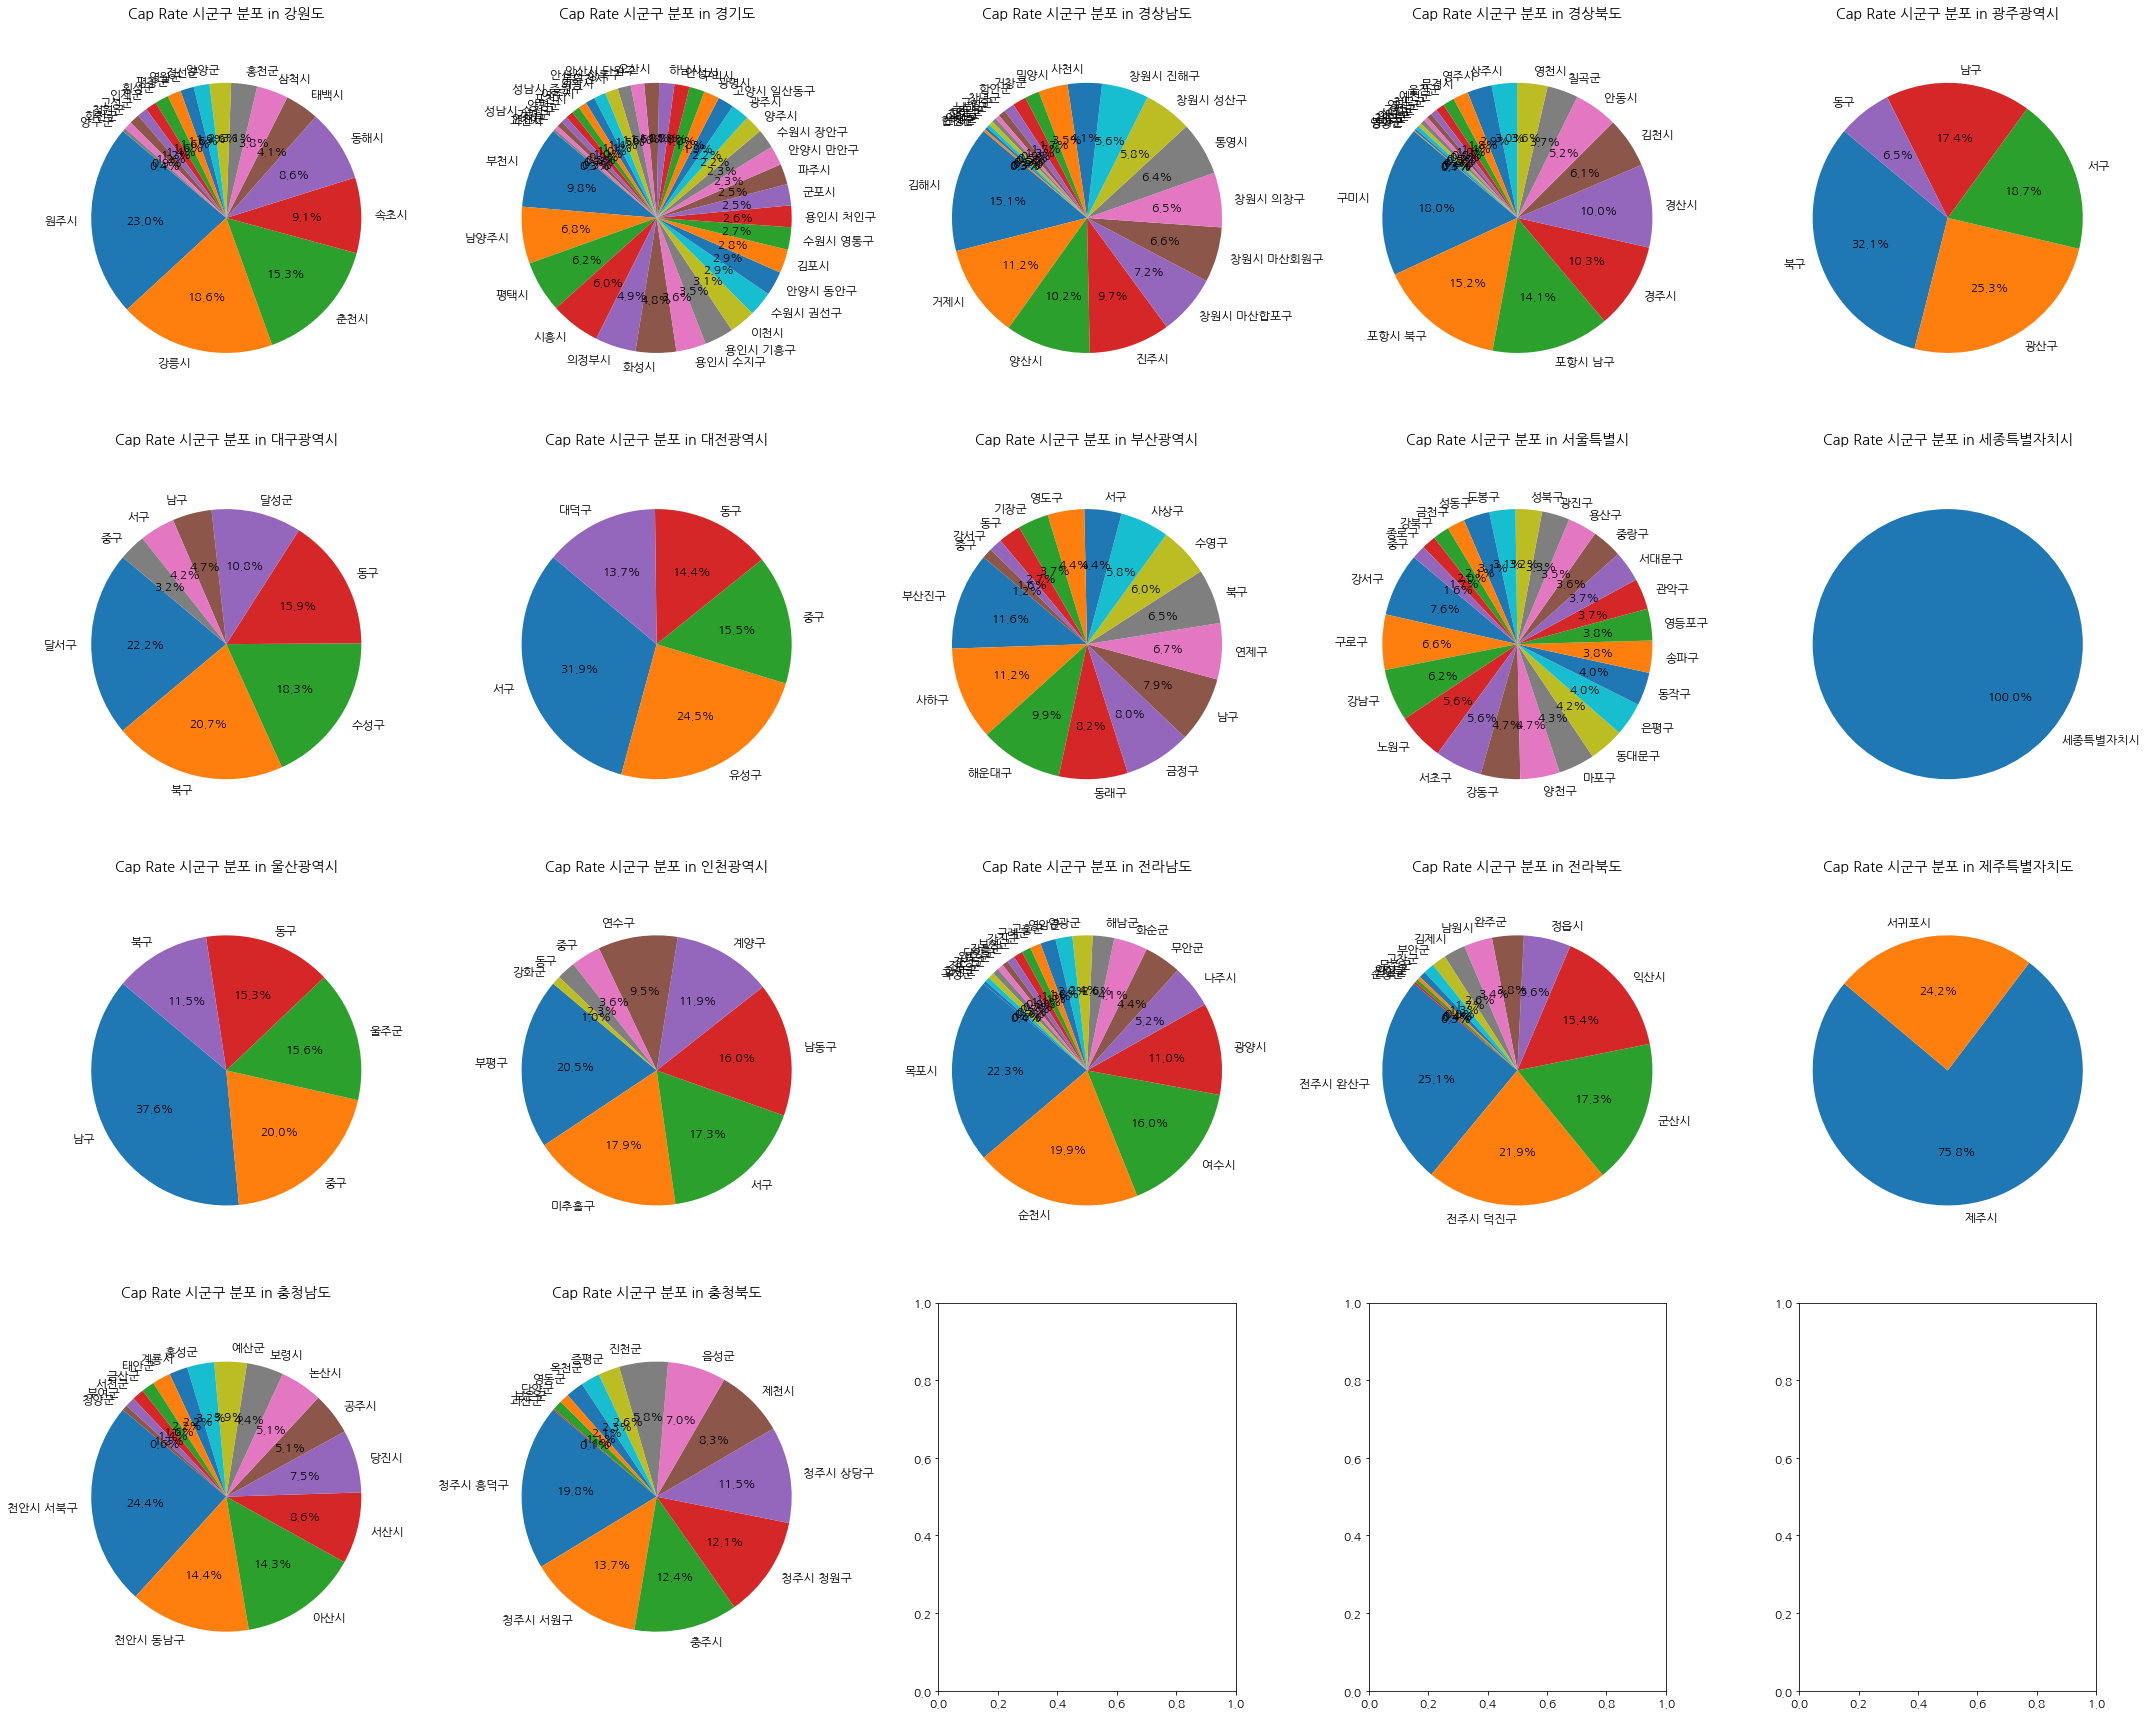

In [65]:
from math import ceil
# Group by '시도' and count city occurrences
state_city_counts = cap_rate.groupby('시도')['시군구'].value_counts()

# Determine the number of rows and columns for the subplot grid
num_states = len(cap_rate['시도'].unique())
num_rows = min(ceil(num_states / 5), 4)
num_cols = min(5, num_states)

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 24))
axes = axes.ravel()  # Flatten the 2D array of subplots

# Loop through unique states and create pie charts in subplots
unique_states = cap_rate['시도'].unique()
for i, state in enumerate(unique_states):
    state_data = state_city_counts[state]
    ax = axes[i]
    ax.pie(state_data, labels=state_data.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Cap Rate 시군구 분포 in {state}')
    ax.axis('equal')

# Adjust layout spacing
plt.tight_layout()

# Show the plot
plt.show()

* '세종특별자치시'의 경우 시군구가 존재하지 않으므로, '법정동' 비율 시각화
* 데이터가 많이 확보되지 못함

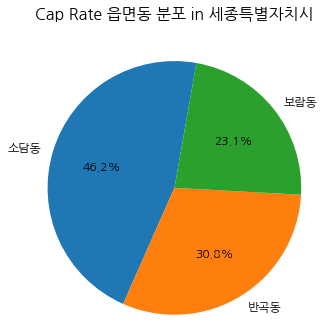

In [66]:
sejong = cap_rate[cap_rate['시도']=='세종특별자치시']
value_counts = sejong['법정동'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=80)
plt.title('Cap Rate 읍면동 분포 in 세종특별자치시', fontsize=16, y=1.1)
plt.rc('font', size=12)
plt.axis('equal')
plt.rc('font', family='NanumGothic')

plt.show()

<h2> Cap Rate 계산 과정

In [69]:
pd.set_option('display.max_rows', 10)

# 2022년 각 시도별 전월세전환율 평균 데이터 불러오기
rate = pd.read_csv('./2022 전월세전환율.csv', header=None)
rate.columns = ['시도', '전월세전환율']

# 시도명으로 맵핑
cap_rate_final = pd.merge(cap_rate, rate, on='시도')

# Cap Rate 계산
cap_rate_final['월세수익'] = cap_rate_final['제곱미터당 월세(만원)']*12
cap_rate_final['전세수익'] = cap_rate_final['제곱미터당 보증금(만원)']*cap_rate_final['전월세전환율']*0.01
cap_rate_final['순수익'] = cap_rate_final['월세수익'] + cap_rate_final['전세수익']
cap_rate_final['Cap Rate'] = cap_rate_final['순수익']/cap_rate_final['제곱미터당 실거래가(만원)']*100
cap_rate_final['연도'] = 2022

# DB 저장에 용이하게 컬럼명 수정
cap_rate_final.rename(columns={'제곱미터당 실거래가(만원)':'제곱미터당_실거래가(만원)', '제곱미터당 월세(만원)':'제곱미터당_월세(만원)','제곱미터당 보증금(만원)':'제곱미터당_보증금(만원)',
                                '전월세전환율':'전월세전환율(%)', '월세수익':'제곱미터당_월세수익(만원)', '전세수익':'제곱미터당_전세수익(만원)', '순수익':'제곱미터당_순수익(만원)', 'Cap Rate':'Cap_Rate'}, inplace=True)

# 보기 좋게 컬럼 순서 바꾸기
cap_rate_final = cap_rate_final[['법정동명', '시도', '시군구', '법정동', '아파트', '제곱미터당_실거래가(만원)', '제곱미터당_월세(만원)', '제곱미터당_보증금(만원)', '전월세전환율(%)', '제곱미터당_월세수익(만원)', '제곱미터당_전세수익(만원)', 
                    '제곱미터당_순수익(만원)', 'Cap_Rate', '연도']]
cap_rate_final

,법정동명,시도,시군구,법정동,아파트,제곱미터당_실거래가(만원),제곱미터당_월세(만원),제곱미터당_보증금(만원),전월세전환율(%),제곱미터당_월세수익(만원),제곱미터당_전세수익(만원),제곱미터당_순수익(만원),Cap_Rate,연도
0,강원특별자치도 강릉시 견소동,강원도,강릉시,견소동,송정한신,336.035626,0.439297,166.422354,5.383,5.271564,8.958515,14.230079,4.234694,2022
1,강원특별자치도 강릉시 견소동,강원도,강릉시,견소동,송정해변신도브래뉴아파트,420.765020,0.221018,272.636401,5.383,2.652211,14.676017,17.328229,4.118267,2022
2,강원특별자치도 강릉시 교동,강원도,강릉시,교동,강릉교동롯데캐슬1단지,379.269909,0.000000,389.348740,5.383,0.000000,20.958643,20.958643,5.526049,2022
3,강원특별자치도 강릉시 교동,강원도,강릉시,교동,강릉교동롯데캐슬2단지,453.121030,0.865377,174.587936,5.383,10.384528,9.398069,19.782597,4.365853,2022
4,강원특별자치도 강릉시 교동,강원도,강릉시,교동,교동1주공,433.765986,0.350169,291.045082,5.383,4.202032,15.666957,19.868988,4.580578,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18043,충청북도 충주시 호암동,충청북도,충주시,호암동,호암동수채,315.259626,0.000000,193.102701,5.275,0.000000,10.186167,10.186167,3.231041,2022
18044,충청북도 충주시 호암동,충청북도,충주시,호암동,세경,97.136145,0.107969,67.369879,5.275,1.295627,3.553761,4.849388,4.992362,2022
18045,충청북도 충주시 호암동,충청북도,충주시,호암동,예성세경,110.906479,0.299517,117.112982,5.275,3.594203,6.177710,9.771913,8.810948,2022
18046,충청북도 충주시 호암동,충청북도,충주시,호암동,진도,155.926488,0.251865,100.069255,5.275,3.022377,5.278653,8.301030,5.323682,2022


* .csv 파일로 저장
```
cap_rate_final.to_csv('cap_rate_2022.csv')
```

* MySQL 저장
```
import pymysql
from sqlalchemy import create_engine
import time

engine = create_engine("mysql+pymysql://" + username + ":" + password + "@localhost:3306/" + database_name + "?charset=utf8mb4")
conn = engine.connect()
table_name = 'cap_rate_2022'
start_time = time.time()
cap_rate_final.to_sql(name=table_name, con=engine, if_exists='append', index=False)
end_time = time.time()
taketime = str(end_time - start_time)
print(table_name+" 스크립트 실행 소요시간 (단위 초) : " + taketime)
```

# 그 외 지역별 분석 및 시각화 진행

* 전체 Cap Rate 분포 확인

Text(0.5, 1.0, '전국 2022년 Cap Rate 전체 분포')

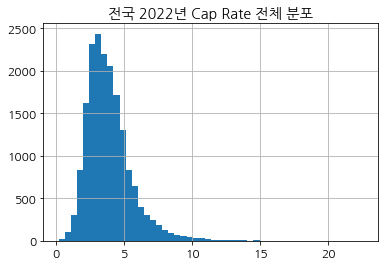

In [71]:
cap_rate_final['Cap_Rate'].hist(bins=50)
plt.title('전국 2022년 Cap Rate 전체 분포')

* 법정동별 Cap Rate 비교

In [73]:
cap_rate_by_dong = cap_rate_final.groupby(['시도', '시군구', '법정동', '법정동명']).mean().reset_index()
cap_rate_by_dong = cap_rate_by_dong[['시도', '시군구', '법정동', 'Cap_Rate']]
cap_rate_by_dong

<ipython-input-73-1ce637de3290>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cap_rate_by_dong = cap_rate_final.groupby(['시도', '시군구', '법정동', '법정동명']).mean().reset_index()


,시도,시군구,법정동,Cap_Rate
0,강원도,강릉시,견소동,4.176481
1,강원도,강릉시,교동,4.825693
2,강원도,강릉시,남문동,4.228769
3,강원도,강릉시,내곡동,5.534121
4,강원도,강릉시,노암동,5.604143
...,...,...,...,...
2792,충청북도,충주시,중앙탑면 용전리,3.543111
2793,충청북도,충주시,지현동,5.160755
2794,충청북도,충주시,칠금동,4.687654
2795,충청북도,충주시,풍동,8.779717


Text(0.5, 1.0, '전국 2022년 읍면동 기준 Cap Rate 전체 분포')

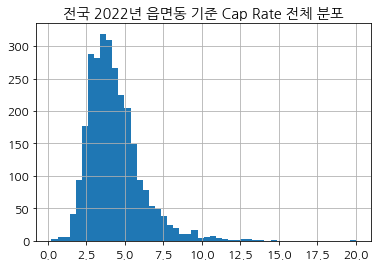

In [74]:
cap_rate_by_dong['Cap_Rate'].hist(bins=50)
plt.title('전국 2022년 읍면동 기준 Cap Rate 전체 분포')

In [75]:
# Cap Rate 상위 20개 법정동
pd.set_option('display.max_rows', 20)
top_prices = cap_rate_by_dong.nlargest(20, 'Cap_Rate')
top_prices

,시도,시군구,법정동,Cap_Rate
2270,전라북도,남원시,내척동,20.000918
2500,충청남도,서산시,오남동,14.808680
26,강원도,동해시,단봉동,14.021886
2350,전라북도,전주시 완산구,다가동2가,13.740958
1156,경상북도,청도군,화양읍 범곡리,13.584234
1178,경상북도,포항시 남구,동해면 신정리,13.205601
1068,경상북도,김천시,백옥동,13.004439
2474,충청남도,당진시,우강면 송산리,12.985443
2632,충청남도,홍성군,구항면 오봉리,12.587438
2444,충청남도,공주시,유구읍 유구리,12.512143


In [76]:
# Cap Rate 하위 20개 지역
pd.set_option('display.max_rows', 20)
bottom_prices = cap_rate_by_dong.nsmallest(20, 'Cap_Rate')
bottom_prices

,시도,시군구,법정동,Cap_Rate
106,강원도,정선군,신동읍 조동리,0.234043
1567,부산광역시,부산진구,범전동,0.303008
1634,부산광역시,영도구,신선동3가,0.567000
276,경기도,부천시,내동,0.759868
2515,충청남도,서천군,장항읍 성주리,0.864771
1441,대전광역시,대덕구,신대동,0.885864
1869,서울특별시,용산구,서빙고동,0.989443
1665,서울특별시,강남구,압구정동,1.001660
1444,대전광역시,대덕구,연축동,1.004424
497,경기도,의왕시,고천동,1.025919


* 시군구별/시도별 Cap Rate 비교

In [77]:
pd.set_option('display.max_rows', 10)
cap_rate_by_sigungu = cap_rate_by_dong.groupby(['시도', '시군구']).mean().sort_values('Cap_Rate', ascending=False).reset_index()
cap_rate_by_sido = cap_rate_by_sigungu.groupby('시도').mean().sort_values('Cap_Rate', ascending=False).reset_index()

<ipython-input-77-ef491c9b2743>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cap_rate_by_sigungu = cap_rate_by_dong.groupby(['시도', '시군구']).mean().sort_values('Cap_Rate', ascending=False).reset_index()
<ipython-input-77-ef491c9b2743>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cap_rate_by_sido = cap_rate_by_sigungu.groupby('시도').mean().sort_values('Cap_Rate', ascending=False).reset_index()


In [78]:
# 시군구별 비교
cap_rate_by_sigungu

,시도,시군구,Cap_Rate
0,경상북도,영양군,9.585428
1,경상북도,청도군,8.731231
2,전라북도,순창군,7.932613
3,전라남도,해남군,7.410151
4,강원도,동해시,6.777938
...,...,...,...
236,서울특별시,송파구,2.212105
237,세종특별자치시,세종특별자치시,2.183341
238,서울특별시,용산구,2.162073
239,서울특별시,강남구,2.125194


In [79]:
# 시도별 비교
cap_rate_by_sido

,시도,Cap_Rate
0,전라북도,5.809991
1,충청남도,5.752625
2,경상북도,5.680425
3,충청북도,5.504085
4,강원도,5.197012
...,...,...
12,부산광역시,3.469373
13,경기도,3.309399
14,대구광역시,3.300373
15,서울특별시,2.549811


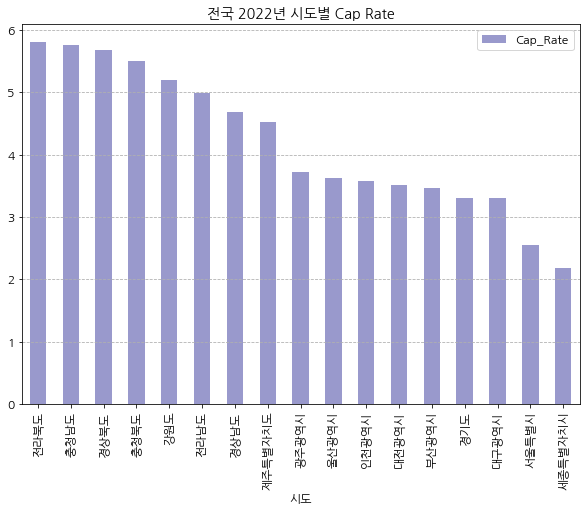

In [80]:
cap_rate_by_sido.plot(kind="bar", x='시도', y='Cap_Rate', alpha=0.4, figsize=(10,7),  cmap=plt.get_cmap("jet"),sharex=False)
plt.rc('font', family='NanumGothic')
plt.title('전국 2022년 시도별 Cap Rate')
plt.grid(True, axis='y', linestyle='--')
plt.legend()